In [1]:
## Importing the useful libraries for preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## reading the dataset
df = pd.read_excel('machine_data.xlsx')

In [3]:
df.head()

,Rated_Torque_Nm,Rated_Power_kW,Rated_Pf,Base_Speed_rpm,Max_Speed_rpm,Line_Voltage_V,peak_torque,Cooling_type
0,110.00,46.076692,0.9,4000.0,12000,300.00,210.00,Liquid
1,100.00,47.123890,0.9,4500.0,9000,804.36,100.00,Liquid
2,437.68,110.000982,0.9,2400.0,6000,750.00,460.00,air
3,22.38,7.499610,0.9,3200.0,1400,180.64,33.57,air
4,3.00,0.628319,0.9,2000.0,10000,157.07,4.50,air


In [4]:
## Power factor column i.e. "Rated_Pf" is not creating much impact,
## Also in practical case we always wants high power factor motor.
## Hence we can drop that column

In [5]:
df.drop('Rated_Pf',axis = 1,inplace = True)

In [6]:
df.corr()

,Rated_Torque_Nm,Rated_Power_kW,Base_Speed_rpm,Max_Speed_rpm,Line_Voltage_V,peak_torque
Rated_Torque_Nm,1.000000,0.747255,-0.279742,-0.329310,0.515295,0.810103
Rated_Power_kW,0.747255,1.000000,0.100664,-0.082675,0.615899,0.639688
Base_Speed_rpm,-0.279742,0.100664,1.000000,0.546891,-0.063778,-0.124834
Max_Speed_rpm,-0.329310,-0.082675,0.546891,1.000000,-0.131547,-0.217950
Line_Voltage_V,0.515295,0.615899,-0.063778,-0.131547,1.000000,0.367627
peak_torque,0.810103,0.639688,-0.124834,-0.217950,0.367627,1.000000


In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Rated_Torque_Nm,Rated_Power_kW,Base_Speed_rpm,Max_Speed_rpm,Line_Voltage_V,peak_torque
Rated_Torque_Nm,1.000000,0.747255,-0.279742,-0.329310,0.515295,0.810103
Rated_Power_kW,0.747255,1.000000,0.100664,-0.082675,0.615899,0.639688
Base_Speed_rpm,-0.279742,0.100664,1.000000,0.546891,-0.063778,-0.124834
Max_Speed_rpm,-0.329310,-0.082675,0.546891,1.000000,-0.131547,-0.217950
Line_Voltage_V,0.515295,0.615899,-0.063778,-0.131547,1.000000,0.367627
peak_torque,0.810103,0.639688,-0.124834,-0.217950,0.367627,1.000000


In [8]:
## here we can see that two columns, "Rated_Torque_Nm and Rated_Power_kW" are highly correlated.
## And also it should be in this way because of the below given formula.
## Because Power = Torque*(angular_speed)
## So i am dropping here "Rated_Power_kW"

In [9]:
df.drop('Rated_Power_kW', axis = 1, inplace = True)

In [10]:
df.head()

,Rated_Torque_Nm,Base_Speed_rpm,Max_Speed_rpm,Line_Voltage_V,peak_torque,Cooling_type
0,110.00,4000.0,12000,300.00,210.00,Liquid
1,100.00,4500.0,9000,804.36,100.00,Liquid
2,437.68,2400.0,6000,750.00,460.00,air
3,22.38,3200.0,1400,180.64,33.57,air
4,3.00,2000.0,10000,157.07,4.50,air


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rated_Torque_Nm  38 non-null     float64
 1   Base_Speed_rpm   38 non-null     float64
 2   Max_Speed_rpm    38 non-null     int64  
 3   Line_Voltage_V   38 non-null     float64
 4   peak_torque      38 non-null     float64
 5   Cooling_type     38 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.9+ KB


In [12]:
## Handling Categorical Column "Cooling_Type"
df['Cooling_type'].unique()

array(['Liquid', 'air'], dtype=object)

In [13]:
df['Cooling_type']=pd.get_dummies(df['Cooling_type'],drop_first=True)

In [14]:
df.head()

,Rated_Torque_Nm,Base_Speed_rpm,Max_Speed_rpm,Line_Voltage_V,peak_torque,Cooling_type
0,110.00,4000.0,12000,300.00,210.00,0
1,100.00,4500.0,9000,804.36,100.00,0
2,437.68,2400.0,6000,750.00,460.00,1
3,22.38,3200.0,1400,180.64,33.57,1
4,3.00,2000.0,10000,157.07,4.50,1


In [15]:
## Clustering the Motors using Kmeans.

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [17]:
X = df[['Rated_Torque_Nm','Base_Speed_rpm','Max_Speed_rpm','Line_Voltage_V','peak_torque','Cooling_type']].iloc[:,:].values

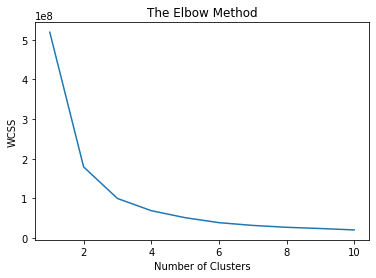

In [18]:
## Finding Optimum Cluster Using Elbow Method
wcss=[]
K = range(1,11)
for i in K:
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot()

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#######Automation of Elbow Method
We are finding the perpendicular distance of each corresponding to number of cluster with the straight line joining the extreme end clusters. Whereever the distance is coming maximum we are choosing (K_max_dist + 1) as final k. From where this 1 came from, actually we have tested our algorithm on  different data then found out this conclusion.

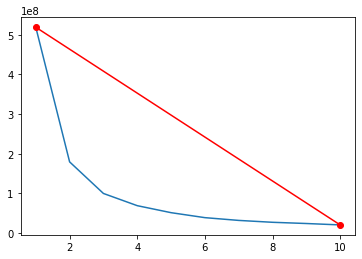

In [19]:
plt.plot(K,wcss)
plt.plot([K[0],K[9]], [wcss[0],wcss[9]],'ro-')
plt.show()

In [20]:
# Function to calculate the distance of point from a line
def cal_dist(x1,y1,a,b,c):
    d = abs((a*x1 + b*y1 + c)) / (np.sqrt(a**2+b**2))
    return d

In [21]:
a = wcss[0] - wcss[9]
b = K[9] - K[0]
c1 = K[0] * wcss[9]
c2 = K[9]  *wcss[0]
c = c1 - c2

In [22]:
dist_of_points = []
for k in range(10):
    dist_of_points.append(cal_dist(K[k],wcss[k],a,b,c))

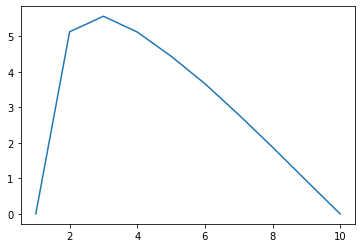

In [23]:
plt.plot(K,dist_of_points)

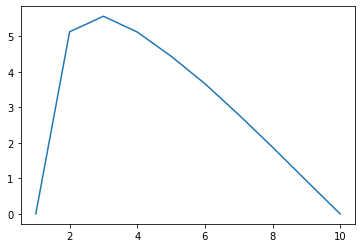

In [24]:
## Plotting distances corresponding to different k.
plt.plot(K,dist_of_points)

In [25]:
#### Automated K value:
final_k = dist_of_points.index(max(dist_of_points))+1

In [26]:
final_k

3

In [27]:
df.isnull().sum()

Rated_Torque_Nm    0
Base_Speed_rpm     0
Max_Speed_rpm      0
Line_Voltage_V     0
peak_torque        0
Cooling_type       0
dtype: int64

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
df1 = df.copy()

In [30]:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
scaler3 = MinMaxScaler()
scaler4 = MinMaxScaler()
scaler5 = MinMaxScaler()

scaler1.fit(df1[['Rated_Torque_Nm']])
df1['Rated_Torque_Nm'] = scaler1.transform(df1[['Rated_Torque_Nm']])

scaler2.fit(df1[['Base_Speed_rpm']])
df1['Base_Speed_rpm'] = scaler2.transform(df1[['Base_Speed_rpm']])

scaler3.fit(df1[['Max_Speed_rpm']])
df1['Max_Speed_rpm'] = scaler3.transform(df1[['Max_Speed_rpm']])

scaler4.fit(df1[['Line_Voltage_V']])
df1['Line_Voltage_V'] = scaler4.transform(df1[['Line_Voltage_V']])

scaler5.fit(df1[['peak_torque']])
df1['peak_torque'] = scaler5.transform(df1[['peak_torque']])

In [31]:
df1.head(5)

,Rated_Torque_Nm,Base_Speed_rpm,Max_Speed_rpm,Line_Voltage_V,peak_torque,Cooling_type
0,0.251223,0.609551,0.779412,0.322425,0.163680,0
1,0.228372,0.707163,0.558824,1.000000,0.076065,0
2,1.000000,0.297192,0.338235,0.926971,0.362804,1
3,0.051003,0.453372,0.000000,0.162072,0.023154,1
4,0.006718,0.219102,0.632353,0.130407,0.000000,1


In [32]:
X1 = df1[['Rated_Torque_Nm','Base_Speed_rpm','Max_Speed_rpm','Line_Voltage_V','peak_torque','Cooling_type']].iloc[:,:].values

In [33]:
kmeans = KMeans(n_clusters=final_k, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X1)

print(Y)

[0 0 2 1 1 0 0 0 2 0 0 2 1 1 0 0 1 1 0 1 0 0 1 0 0 2 1 1 1 0 0 0 0 0 2 0 2
 1]


In [34]:
df['cluster']=Y

In [35]:
df.head(5)

,Rated_Torque_Nm,Base_Speed_rpm,Max_Speed_rpm,Line_Voltage_V,peak_torque,Cooling_type,cluster
0,110.00,4000.0,12000,300.00,210.00,0,0
1,100.00,4500.0,9000,804.36,100.00,0,0
2,437.68,2400.0,6000,750.00,460.00,1,2
3,22.38,3200.0,1400,180.64,33.57,1,1
4,3.00,2000.0,10000,157.07,4.50,1,1


In [36]:
df1['cluster'] = Y

In [37]:
df1.head()

,Rated_Torque_Nm,Base_Speed_rpm,Max_Speed_rpm,Line_Voltage_V,peak_torque,Cooling_type,cluster
0,0.251223,0.609551,0.779412,0.322425,0.163680,0,0
1,0.228372,0.707163,0.558824,1.000000,0.076065,0,0
2,1.000000,0.297192,0.338235,0.926971,0.362804,1,2
3,0.051003,0.453372,0.000000,0.162072,0.023154,1,1
4,0.006718,0.219102,0.632353,0.130407,0.000000,1,1


In [38]:
## Seperating the clusters
df_new=[]
for i in range(final_k):
    df_new.append(df1[df1['cluster']==i])

In [39]:
## Seperating the cluster to be able to show the user real parameter value.
df_show=[]
for i in range(final_k):
    df_show.append(df[df['cluster']==i])

In [40]:
## Finding the covariance and mean for different groups
C = []
mu = []
for group in df_new:
    x = group[['Rated_Torque_Nm','Base_Speed_rpm','Max_Speed_rpm','Line_Voltage_V','peak_torque','Cooling_type']].iloc[:,:]
    mu.append(np.mean(x))
    C.append(np.cov(x,rowvar=False))

In [41]:
## Mahalanobis Distance Calculator
## Function to calculate Mahalanobis distance and hence nearest cluster
def nearest_cluster(mu,C,X):
    dist = []
    for i in range(final_k):
        d = np.sqrt(np.matmul(np.matmul(((X-mu[i].values).T),C[i]),(X-mu[i].values)))
        dist.append(d)
    nearest_cluster = dist.index(min(dist))
    return nearest_cluster

In [42]:
## Function to PreProcess Input Datapoint
def preProcess(X):
    input_df = pd.DataFrame([X],columns=['Rated_Torque_Nm','Base_Speed_rpm','Max_Speed_rpm','Line_Voltage_V','peak_torque','Cooling_type'])

    input_df['Rated_Torque_Nm'] = scaler1.transform(input_df[['Rated_Torque_Nm']])

    input_df['Base_Speed_rpm'] = scaler2.transform(input_df[['Base_Speed_rpm']])

    input_df['Max_Speed_rpm'] = scaler3.transform(input_df[['Max_Speed_rpm']])

    input_df['Line_Voltage_V'] = scaler4.transform(input_df[['Line_Voltage_V']])

    input_df['peak_torque'] = scaler5.transform(input_df[['peak_torque']])
    
    X = input_df.values.tolist()[0]
    return X

In [43]:
## Function to predict the outputs
def predictor(mu,C,X,df):
    X = preProcess(X)
    cluster = nearest_cluster(mu,C,X)
    return df[cluster].head(5)

####### Predictions:

In [44]:
## Inputs
X1i = [110.00,4000.0,12000,300.00,210.00,0] 
X2i = [22.38,3200.0,1400,180.64,33.57,1] 
X3i = [0,0,0,0,0,0]
X4i = [450.00,2400.0,6000,750,600.00,0]

In [45]:
predictor(mu,C,X1i,df_show)

,Rated_Torque_Nm,Base_Speed_rpm,Max_Speed_rpm,Line_Voltage_V,peak_torque,Cooling_type,cluster
0,110.00,4000.0,12000,300.00,210.0,0,0
1,100.00,4500.0,9000,804.36,100.0,0,0
5,50.00,4400.0,11000,240.00,75.0,0,0
6,133.33,3350.0,15000,300.00,200.0,0,0
7,87.00,3600.0,12000,360.00,174.0,0,0


In [46]:
predictor(mu,C,X2i,df_new)

,Rated_Torque_Nm,Base_Speed_rpm,Max_Speed_rpm,Line_Voltage_V,peak_torque,Cooling_type,cluster
3,0.051003,0.453372,0.000000,0.162072,0.023154,1,1
4,0.006718,0.219102,0.632353,0.130407,0.000000,1,1
12,0.454458,0.062923,0.338235,0.591112,0.104739,1,1
13,0.155249,0.000000,0.338235,0.792627,0.104739,1,1
16,0.072986,0.121490,0.338235,0.725455,0.034648,1,1


In [47]:
predictor(mu,C,X3i,df_show)

,Rated_Torque_Nm,Base_Speed_rpm,Max_Speed_rpm,Line_Voltage_V,peak_torque,Cooling_type,cluster
3,22.38,3200.00,1400,180.64,33.57,1,1
4,3.00,2000.00,10000,157.07,4.50,1,1
12,198.94,1200.00,6000,500.00,136.00,1,1
13,68.00,877.69,6000,650.00,136.00,1,1
16,32.00,1500.00,6000,600.00,48.00,1,1


In [48]:
predictor(mu,C,X4i,df_show)

,Rated_Torque_Nm,Base_Speed_rpm,Max_Speed_rpm,Line_Voltage_V,peak_torque,Cooling_type,cluster
2,437.68,2400.0,6000,750.0,460.0,1,2
8,420.00,1500.0,4500,400.0,1260.0,0,2
11,324.00,1200.0,2400,400.0,400.0,0,2
25,437.67,2400.0,6000,750.0,460.0,0,2
34,240.00,4000.0,5000,650.0,660.0,0,2


For n_clusters = 2 The average silhouette_score is : 0.47151889450267437
For n_clusters = 3 The average silhouette_score is : 0.4725539668890563
For n_clusters = 4 The average silhouette_score is : 0.41692525292344623
For n_clusters = 5 The average silhouette_score is : 0.39279849303166664
For n_clusters = 6 The average silhouette_score is : 0.3893710845763638


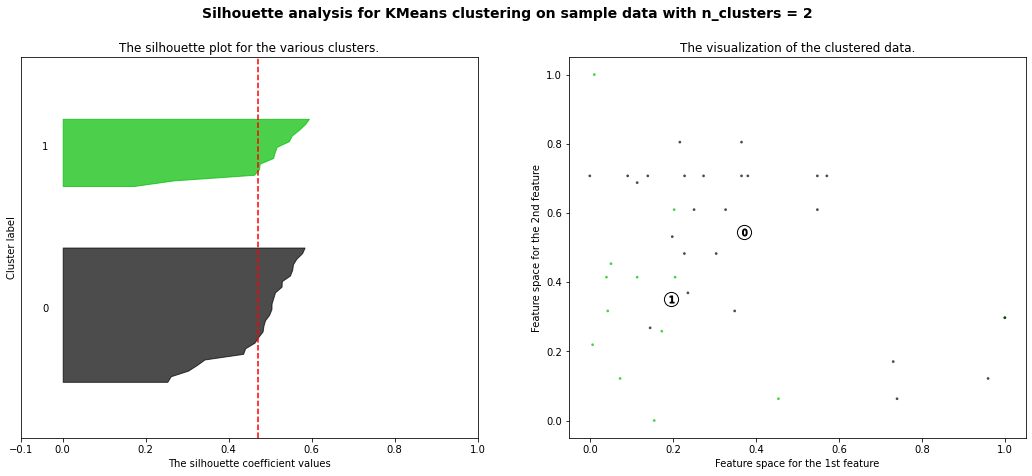

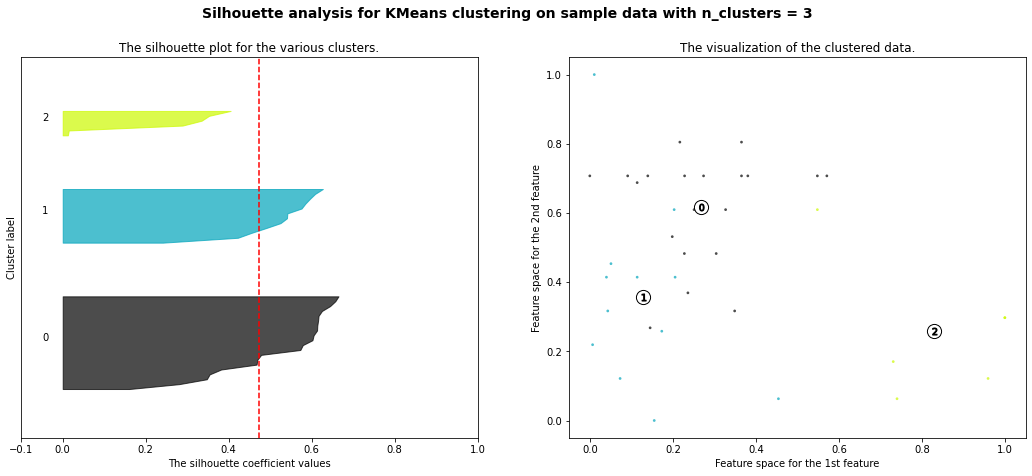

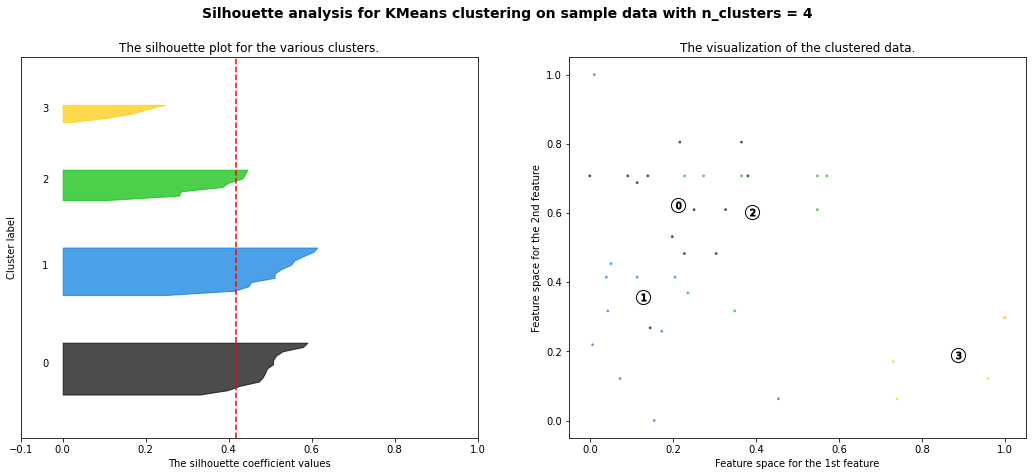

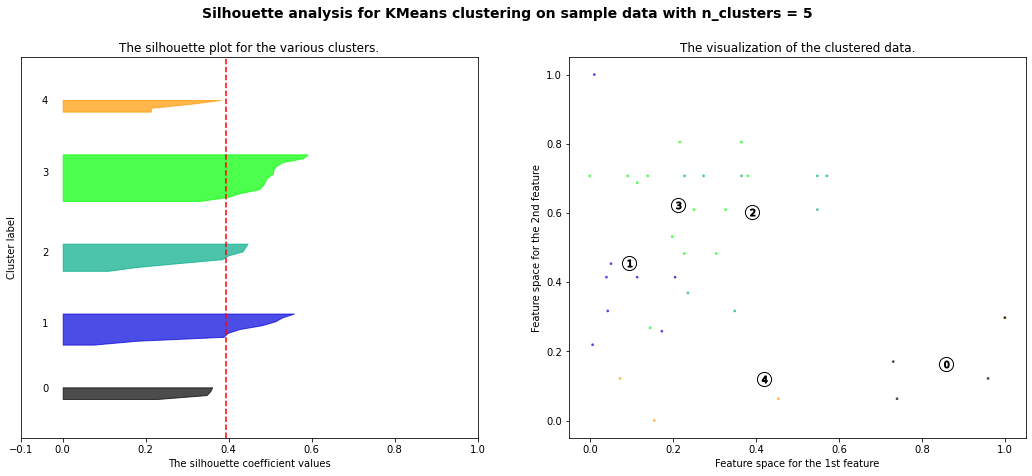

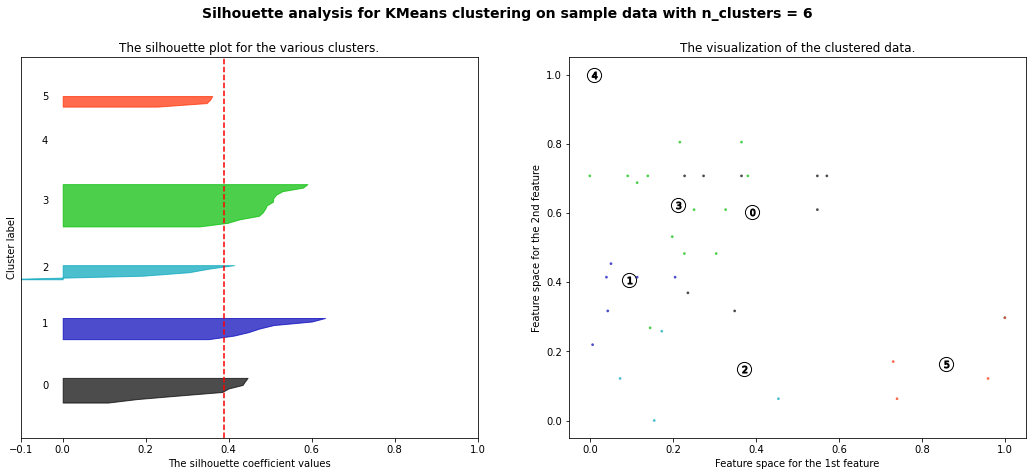

In [49]:
## Verification of the Automated K-value Calculator.
## Using Silhouette Score as the metric
range_n_clusters = [2,3,4,5,6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X1[:, 0], X1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

* As we can see when k = 3, we have best silhouette score, Also we can see in the figure that when k = 3, there is not any overlapping between two clusters. So we can say that best value of k is 3. And our model algorithm for automated k is working good.